In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

E:\nani ana\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_file=r'E:/Kaggle NLP/train.csv'
test_file=r'E:/Kaggle NLP/test.csv'

In [3]:
fb_train=pd.read_csv(train_file)
fb_test=pd.read_csv(test_file)

Taking a look into the top 5 rows of both train and test data so that we can get some insights to it. Cheking the data types of each feature and the shape of both train and test data. Later using describe() we are looking into the min.,max, 50%, 25%, 75%, std and mean of each predictors.

In [4]:
fb_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
fb_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
fb_train.drop(['id','keyword','location'],inplace=True,axis=1)
fb_test.drop(['id','keyword','location'],inplace=True,axis=1)

In [7]:
fb_train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
fb_test.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
fb_test.shape

(3263, 1)

In [10]:
fb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [11]:
fb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3263 non-null   object
dtypes: object(1)
memory usage: 25.6+ KB


In [12]:
fb_train.describe()

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [13]:
fb_train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

# EXPLORING DATA SET

In [14]:
fb_train.isnull().sum()

text      0
target    0
dtype: int64

In [15]:
fb_test.isnull().sum()

text    0
dtype: int64

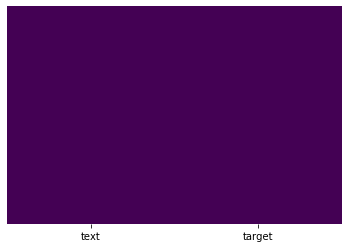

In [16]:
sns.heatmap(fb_train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

clearly  no null values in train data

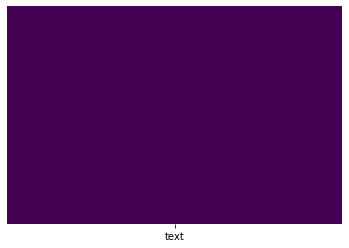

In [17]:
sns.heatmap(fb_test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000149261C8>]],
      dtype=object)

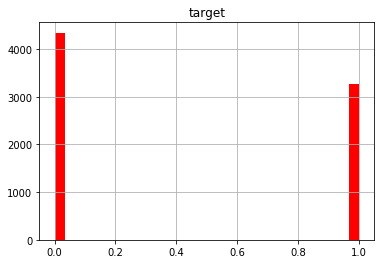

In [18]:
fb_train.hist(bins=30,color='r')

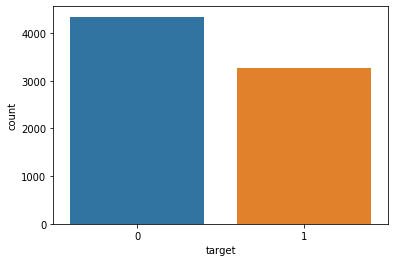

In [19]:
sns.countplot(fb_train['target'])

In [20]:
#finding the lengths of text
fb_train['length']=fb_train['text'].apply(len)
fb_test['length']=fb_test['text'].apply(len)

In [21]:
fb_train.head()

,text,target,length
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


In [22]:
fb_test.head()

,text,length
0,Just happened a terrible car crash,34
1,"Heard about #earthquake is different cities, s...",64
2,"there is a forest fire at spot pond, geese are...",96
3,Apocalypse lighting. #Spokane #wildfires,40
4,Typhoon Soudelor kills 28 in China and Taiwan,45


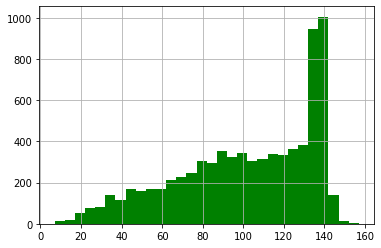

In [23]:
fb_train['length'].hist(bins=30,color='g')

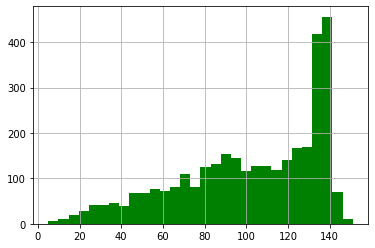

In [24]:
fb_test['length'].hist(bins=30,color='g')

In [25]:
fb_train.describe()

,target,length
count,7613.00000,7613.000000
mean,0.42966,101.037436
std,0.49506,33.781325
min,0.00000,7.000000
25%,0.00000,78.000000
50%,0.00000,107.000000
75%,1.00000,133.000000
max,1.00000,157.000000


In [26]:
#fb_test.describe()

lets see howmany possitive targets and negitive targets

In [27]:
#possitivve text
possitive=fb_train[fb_train['target']==0]
possitive

,text,target,length
15,What's up man?,0,14
16,I love fruits,0,13
17,Summer is lovely,0,16
18,My car is so fast,0,17
19,What a goooooooaaaaaal!!!!!!,0,28
...,...,...,...
7581,@engineshed Great atmosphere at the British Li...,0,104
7582,Cramer: Iger's 3 words that wrecked Disney's s...,0,80
7584,These boxes are ready to explode! Exploding Ki...,0,127
7587,Sirens everywhere!,0,18


In [28]:
#possitivve text
negitive=fb_train[fb_train['target']==1]
negitive

,text,target,length
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,83
7609,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,Police investigating after an e-bike collided ...,1,137


# WORD CLOUD PLOT

In [29]:
sentence=fb_train['text'].tolist()
sentence

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
 "I'm on top of the hill and I can see a fire in the woods...",
 "There's an emergency evacuation happening now in the building across the street",
 "I'm afraid that the tornado is coming to our area...",
 'Three people died from the heat wave so far',
 'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA 

In [30]:
len(sentence)

7613

In [31]:
sent_as_one_str="".join(sentence)
sent_as_one_str

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us allForest fire near La Ronge Sask. CanadaAll residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected13,000 people receive #wildfires evacuation orders in California Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areasI'm on top of the hill and I can see a fire in the woods...There's an emergency evacuation happening now in the building across the streetI'm afraid that the tornado is coming to our area...Three people died from the heat wave so farHaha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding#raining #flooding #Florida #TampaBay #

In [76]:
#!pip install WordCloud
#from wordcloud import WordCloud

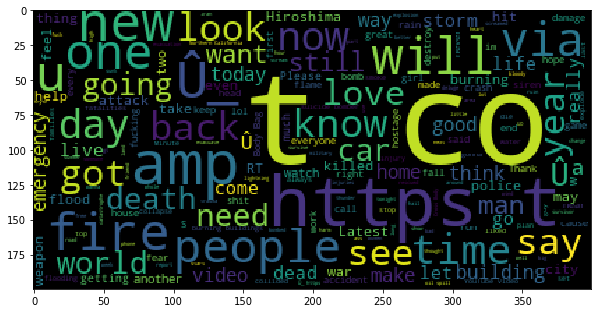

In [77]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sent_as_one_str))

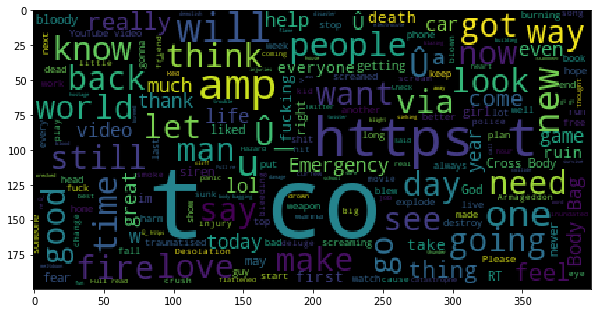

In [78]:
#for possitive
pstv_snt=possitive['text'].tolist()
pstv_snt_os="".join(pstv_snt)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(pstv_snt_os))

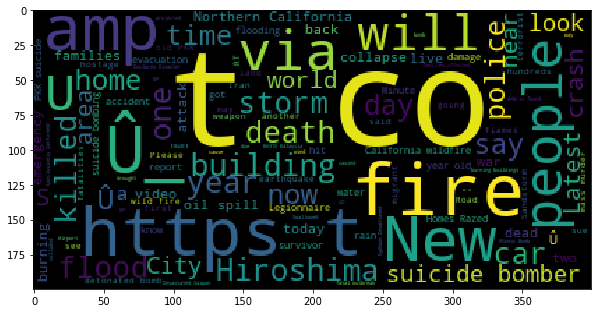

In [79]:
#for negitive
neg_snt=negitive['text'].tolist()
neg_snt_os="".join(neg_snt)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(neg_snt_os))

# DATA CLEANING

# EXAMPLES OF HOW STOP WORDs,PUNCTUATION AND COUNTVECTORIZER WORks

# punctuation

In [39]:
#Here explained how punctuation works on Text data
#[From line In''''''[102]''''''''''to In''''''''''''''[106]''''''''''''''  
#with example

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
#EXAMPLE OF PUNCTUATION
Testing_punc='Good morning people:)... iam learning Natural language processing...!!!!#$% this is very intresting it may be our subject in future days'

In [42]:
Test_punc_rmvd=[]
for char in Testing_punc:
    if char not in string.punctuation:
        Test_punc_rmvd.append(char)

In [43]:
Test_punc_rmvd_join=''.join(Test_punc_rmvd)
Test_punc_rmvd_join

'Good morning people iam learning Natural language processing this is very intresting it may be our subject in future days'

# Stop words

In [44]:
import nltk         #natural language tool kit

E:\nani ana\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
E:\nani ana\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
#example of Stop words
#from the example of the Punctuation
Test_punc_rmvd_join

'Good morning people iam learning Natural language processing this is very intresting it may be our subject in future days'

In [48]:
Test_punc_rmvd_join_clean=[word for word in Test_punc_rmvd_join.split() if word.lower() not in stopwords.words('english')]
Test_punc_rmvd_join_clean

['Good',
 'morning',
 'people',
 'iam',
 'learning',
 'Natural',
 'language',
 'processing',
 'intresting',
 'may',
 'subject',
 'future',
 'days']

# Perform count vectorization

# Tokenization

#Example for how CountVectorizer Performs

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
sample=['This is the first paper.','This paper is the second','And this is third']

In [51]:
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(sample)

In [52]:
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'paper', 'second', 'the', 'third', 'this']


In [53]:
print(x.toarray())

[[0 1 1 1 0 1 0 1]
 [0 0 1 1 1 1 0 1]
 [1 0 1 0 0 0 1 1]]


# function to perform Puncuation ,Stopwords

In [54]:
#function for cleaning all the text
#function performs 
#1) remove punctuation
#remove stopwords

In [55]:
def message_cleaning(message):
    Test_punc_removed=[char for char in message if char not in string.punctuation]
    Test_punc_removed_join=''.join(Test_punc_removed)
    Test_punc_removed_join_clean=[word for word in Test_punc_removed_join.split() 
                                  if word.lower not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [56]:
fb_train_clean=fb_train['text'].apply(message_cleaning)
print(fb_train_clean[5])

['RockyFire', 'Update', 'California', 'Hwy', '20', 'closed', 'in', 'both', 'directions', 'due', 'to', 'Lake', 'County', 'fire', 'CAfire', 'wildfires']


In [57]:
fb_test_clean=fb_test['text'].apply(message_cleaning)
print(fb_test_clean[5])

['Were', 'shakingIts', 'an', 'earthquake']


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer=CountVectorizer(analyzer=message_cleaning)
train_countvectorizer=cv= CountVectorizer(max_features=3263,ngram_range=(1, 2),min_df=5).fit_transform(fb_train['text']).toarray()

In [59]:
train_countvectorizer.shape

(7613, 3263)

In [60]:
test_countvectorizer=CountVectorizer(max_features=3263).fit_transform(fb_test['text']).toarray()

In [61]:
test_countvectorizer.shape

(3263, 3263)

In [62]:
X=train_countvectorizer

In [63]:
y=fb_train['target']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2)

In [66]:
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((6090, 3263), (1523, 3263), (6090,), (1523,))

# NB

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
NB_classifier=MultinomialNB()

In [69]:
NB_classifier.fit(x_train1,y_train1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
y_predict_test=NB_classifier.predict(x_test1)

In [72]:
cm=confusion_matrix(y_test1,y_predict_test)

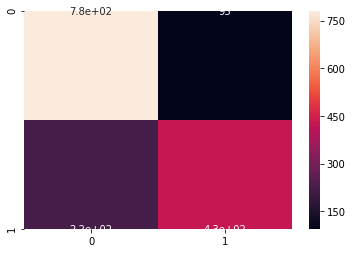

In [73]:
sns.heatmap(cm,annot=True)

In [74]:
print(classification_report(y_test1,y_predict_test))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       874
           1       0.82      0.66      0.73       649

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.80      0.79      0.79      1523



# ################################################

In [80]:
x_train=train_countvectorizer

In [81]:
x_test=fb_train['target']

In [82]:
y_train=test_countvectorizer
y_train.shape

(3263, 3263)

In [83]:
NB_classifier.fit(x_train,x_test)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [84]:
predictions=NB_classifier.predict(y_train)

In [85]:
d1=pd.DataFrame(predictions)

In [86]:
d1

,0
0,1
1,1
2,1
3,0
4,1
...,...
3258,1
3259,1
3260,1
3261,1


In [87]:
k_submission=pd.DataFrame({'id':fb_test['id'],'target':d})

KeyError: 'id'

In [ ]:
k_submission.to_csv('kaggle_submission.csv',index=False)

#Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [89]:
params={'class_weight':['balanced',None],
        'penalty':['l1','l2'],
        'C':np.linspace(0.01,1000,10)}

In [90]:
model=LogisticRegression(fit_intercept=True)

In [91]:
random_search=RandomizedSearchCV(model,cv=10,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 n_iter=10
                                    )

In [92]:
random_search.fit(x_train,x_test)

E:\nani ana\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
E:\nani ana\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check t

E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklea

E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklea

E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\nani ana\lib\site-packages\sklea

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([1.0000e-02, 1.1112e+02, 2.2223e+02, 3.3334e+02, 4.4445e+02,
       5.5556e+02, 6.6667e+02, 7.7778e+02, 8.8889e+02, 1.0000e+03]),
                                        'class_weight': ['balanced', None],
              

In [93]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [94]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.596 (std: 0.08527)
Parameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 333.34}

Model with rank: 2
Mean validation score: 0.595 (std: 0.08495)
Parameters: {'penalty': 'l2', 'class_weight': None, 'C': 444.45}

Model with rank: 3
Mean validation score: 0.591 (std: 0.08348)
Parameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 777.78}

Model with rank: 4
Mean validation score: 0.565 (std: 0.08470)
Parameters: {'penalty': 'l1', 'class_weight': None, 'C': 111.12}

Model with rank: 5
Mean validation score: 0.565 (std: 0.08478)
Parameters: {'penalty': 'l1', 'class_weight': 'balanced', 'C': 111.12}



In [97]:
best_estimator=random_search.best_estimator_

In [99]:
best_estimator.fit(x_train,x_test)

E:\nani ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=333.34, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
best_estimator.predict(y_train)

E:\nani ana\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

# DT

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
params={ 'class_weight':[None,'balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [105]:
from sklearn.tree import DecisionTreeClassifier

E:\nani ana\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [106]:
clf=DecisionTreeClassifier()

In [107]:
random_search=RandomizedSearchCV(clf,cv=10,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 n_iter=10
                                    )

In [306]:
random_search.fit(x_train,x_test)

E:\nani ana\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
E:\nani ana\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check t

E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [307]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.706 (std: 0.04137)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 30, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 2
Mean validation score: 0.698 (std: 0.03895)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': 50, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 3
Mean validation score: 0.693 (std: 0.02395)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 15, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 4
Mean validation score: 0.683 (std: 0.03741)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 5
Mean validation score: 0.677 (std: 0.02483)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced'}



In [309]:
best_estimator=random_search.best_estimator_

In [311]:
best_estimator.fit(x_train,x_test)

E:\nani ana\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [312]:
best_estimator.predict(y_train)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

# Random_forest

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
clf=RandomForestClassifier()

In [116]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [5,10,20,25,30,35],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }


In [117]:
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=10,
                                   scoring='roc_auc',
                                   cv=10,
                                  n_jobs=-1,verbose=20)

In [ ]:
random_search.fit(x_train, x_test)

E:\nani ana\lib\site-packages\sklearn\model_selection\_search.py:269: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=rnd):
E:\nani ana\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  5.0min
[Paralle